In [1]:
import pandas as pd
import numpy as np
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
ds=pd.read_csv('C:/Users/user/Downloads/default_plus_chromatic_features_1059_tracks_new.csv')

In [3]:
feature=ds.iloc[:, :-1]
label_str=ds.iloc[:,-1]

In [4]:
lb_make = LabelEncoder()
label=lb_make.fit_transform(label_str)
np.unique(label)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])

In [5]:
feature_scaled = StandardScaler().fit_transform(feature)

In [6]:
feature_scaled.shape

(1058, 116)

# Experimentation with random initialization and distance

In [7]:
wcss = []
sil_score = []
db_score = []
cl=[]
cc=[]
iter_i = []
random_data = []


for i in range(10):
    iter_i.append(i)
    np.random.seed(i)
    r_data = np.random.randint(8, size=(33,116))
    kmeans = KMeans(n_clusters=33, init=r_data, n_init=10, max_iter=4, random_state=i)
    cluster_labels = kmeans.fit_predict(feature_scaled)
    cluster_center = kmeans.cluster_centers_
    cl.append(cluster_labels)
    cc.append(cluster_center)
    wcss.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(feature_scaled, cluster_labels)
    sil_score.append(silhouette_avg)
    db = davies_bouldin_score(feature_scaled, cluster_labels)
    db_score.append(db)
    
#print(wcss)
#print(sil_score)
#print(db_score)


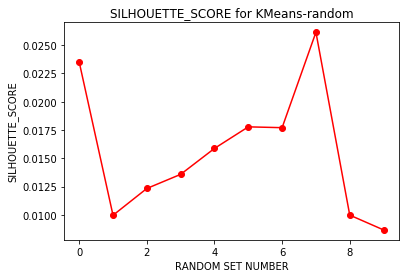

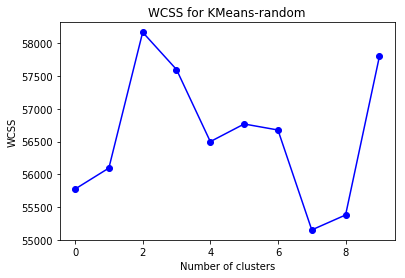

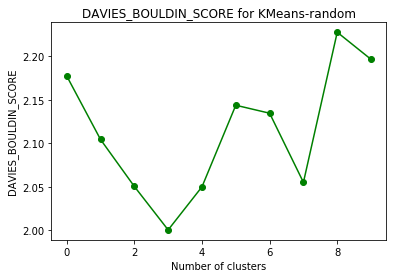

In [8]:
score1_dict = {'RANDOM_SET': iter_i, 'SILHOUETTE_SCORE': sil_score, 'SSE': wcss, 'DAVIES_BOULDIN_SCORE': db_score}
score1_result = pd.DataFrame(data=score1_dict)

score1_result

plt.plot(score1_result['RANDOM_SET'].values, score1_result['SILHOUETTE_SCORE'].values , 'ro-', label="SILHOUETTE_SCORE")
plt.title("SILHOUETTE_SCORE for KMeans-random")
plt.xlabel("RANDOM SET NUMBER")
plt.ylabel("SILHOUETTE_SCORE")
plt.show()

plt.plot(score1_result['RANDOM_SET'].values, score1_result['SSE'].values , 'bo-', label="WCSS")
plt.title("WCSS for KMeans-random")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

plt.plot(score1_result['RANDOM_SET'].values, score1_result['DAVIES_BOULDIN_SCORE'].values , 'go-', label="DAVIES_BOULDIN_SCORE")
plt.title("DAVIES_BOULDIN_SCORE for KMeans-random")
plt.xlabel("Number of clusters")
plt.ylabel("DAVIES_BOULDIN_SCORE")
plt.show()



# Experiment of Evaluation Metrics

In [9]:
wcss = []
rand_score = []
k = []
for i in range(30,40):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(feature)
    predict_labels = kmeans.fit_predict(feature)
    rand_index = adjusted_rand_score(label,predict_labels)
    k.append(i)
    rand_score.append(rand_index)
    wcss.append(kmeans.inertia_)


   K(Number of cluster)  Rand Index           SSE
0                    30    0.063971  49160.482116
1                    31    0.057279  48931.832304
2                    32    0.069209  48765.849228
3                    33    0.062846  48103.974116
4                    34    0.064632  48094.530155
5                    35    0.063137  47550.165455
6                    36    0.058799  47238.912405
7                    37    0.069725  46962.109092
8                    38    0.065923  46590.185053
9                    39    0.070046  46333.642669


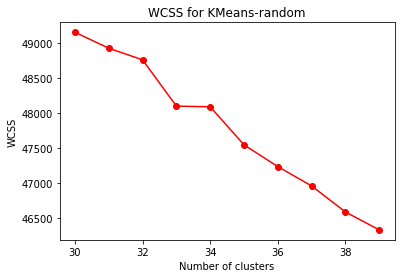

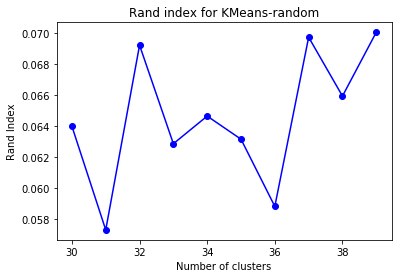

In [10]:
score2_dict = {'K(Number of cluster)': k, 'Rand Index': rand_score, 'SSE': wcss}
score2_result = pd.DataFrame(data=score2_dict)
print(score2_result)

plt.plot(score2_result['K(Number of cluster)'].values, score2_result['SSE'].values , 'ro-', label="WCSS")
plt.title("WCSS for KMeans-random")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

plt.plot(score2_result['K(Number of cluster)'].values, score2_result['Rand Index'].values , 'bo-', label="Rand Index")
plt.title("Rand index for KMeans-random")
plt.xlabel("Number of clusters")
plt.ylabel("Rand Index")
plt.show()

# Experiment with Stopping Crieteria

In [11]:
wcss = []
sil_score = []
db_score = []
max_iter_num = []


for i in range(10,210,20):
    max_iter_num.append(i)
    kmeans = KMeans(n_clusters=33, n_init=10, max_iter=i, random_state=100)
    cluster_labels = kmeans.fit_predict(feature_scaled)
    cluster_center = kmeans.cluster_centers_
    wcss.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(feature_scaled, cluster_labels)
    sil_score.append(silhouette_avg)
    db = davies_bouldin_score(feature_scaled, cluster_labels)
    db_score.append(db)
    
#print(max_iter_num)
#print(wcss)
#print(sil_score)
#print(db_score)

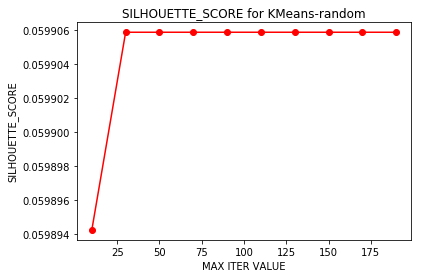

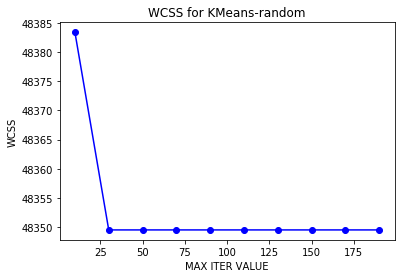

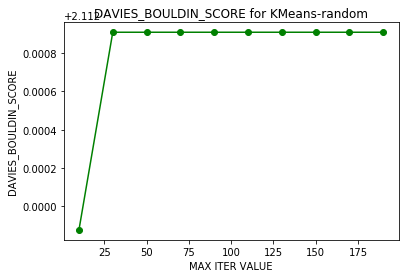

In [12]:
score3_dict = {'STOPPING_CRIETERIA': max_iter_num, 'SILHOUETTE_SCORE': sil_score, 'SSE': wcss, 'DAVIES_BOULDIN_SCORE': db_score}
score3_result = pd.DataFrame(data=score3_dict)

score3_result

plt.plot(score3_result['STOPPING_CRIETERIA'].values, score3_result['SILHOUETTE_SCORE'].values , 'ro-', label="SILHOUETTE_SCORE")
plt.title("SILHOUETTE_SCORE for KMeans-random")
plt.xlabel("MAX ITER VALUE")
plt.ylabel("SILHOUETTE_SCORE")
plt.show()

plt.plot(score3_result['STOPPING_CRIETERIA'].values, score3_result['SSE'].values , 'bo-', label="WCSS")
plt.title("WCSS for KMeans-random")
plt.xlabel("MAX ITER VALUE")
plt.ylabel("WCSS")
plt.show()

plt.plot(score3_result['STOPPING_CRIETERIA'].values, score3_result['DAVIES_BOULDIN_SCORE'].values , 'go-', label="DAVIES_BOULDIN_SCORE")
plt.title("DAVIES_BOULDIN_SCORE for KMeans-random")
plt.xlabel("MAX ITER VALUE")
plt.ylabel("DAVIES_BOULDIN_SCORE")
plt.show()
